In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipdb
import os
import bda_utils

In [2]:
config_df = pd.read_csv('./runs/config_df_70_569.csv', index_col=0)
config_df.columns = ['run', 'detector', 'mu', 't_pre']
config_df

,run,detector,mu,t_pre
0,70,0,0.0,3
1,71,0,0.0,4
2,72,0,0.0,5
3,73,0,0.0,6
4,74,0,0.0,7
...,...,...,...,...
495,565,9,0.9,3
496,566,9,0.9,4
497,567,9,0.9,5
498,568,9,0.9,6


# 对于每个detector

In [3]:
det = 3
data_det = config_df.loc[config_df['detector']==det]
data_det

,run,detector,mu,t_pre
150,220,3,0.0,3
151,221,3,0.0,4
152,222,3,0.0,5
153,223,3,0.0,6
154,224,3,0.0,7
155,225,3,0.1,3
156,226,3,0.1,4
157,227,3,0.1,5
158,228,3,0.1,6
159,229,3,0.1,7


## 关于$\mu$的敏感度分析

In [65]:
def plot_pre(t_pre):
    data_det_pre = data_det.loc[data_det['t_pre']==t_pre]

    s_a = pd.DataFrame([], columns=['mu', 't_pre', 'nrmse', 'mape', 'smape', 'mae'])

    for i in range(len(data_det_pre)):
        folder_name = 'run' + str(data_det_pre.iloc[i, 0])
        mu = data_det_pre.iloc[i, 2]

        g_t_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_g_t.csv', header=None).to_numpy()
        pred_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_pred_result.csv', header=None).to_numpy()
        nrmse = bda_utils.nrmse_loss_func(pred_bda, g_t_bda, 0)
        mape = bda_utils.mape_loss_func(pred_bda, g_t_bda, 0)
        smape = bda_utils.smape_loss_func(pred_bda, g_t_bda, 0)
        mae = bda_utils.mae_loss_func(pred_bda, g_t_bda, 0)

        s_a.loc[i, :] = np.array([mu, t_pre, nrmse, mape, smape, mae])

#     s_a[['nrmse', 'mape', 'smape', 'mae']].plot()
    return s_a

In [68]:
min_loss_df = pd.DataFrame([], columns=['nrmse', 'mape', 'smape', 'mae'])

for t_pre in range(3, 8):
    s_a_pre = plot_pre(t_pre)
    loss_min = np.min(s_a_pre.to_numpy(), axis=0)[2:]
    min_loss_df.loc[t_pre-3, :] = loss_min

### base model

C:\Users\10169\Documents\Github\BDA_traffic\bda_utils.py:76: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


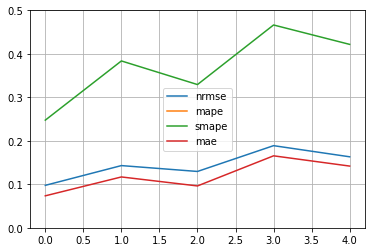

In [10]:
config_df_base = pd.read_csv('./runs_base/config_df_base.csv', index_col=0)
data_base_det = config_df_base.loc[config_df_base['detector']==det]
s_a_l_base = pd.DataFrame([], columns=['t_pre', 'nrmse', 'mape', 'smape', 'mae'])

for i in range(len(data_base_det)):
    folder_name = 'run' + str(data_base_det.iloc[i, 0])
    t_pre = data_base_det.iloc[i, 2]
    
    g_t_base = pd.read_csv('./runs_base/'+folder_name+'/base_regression_g_t.csv', header=None).to_numpy()
    pred_base = pd.read_csv('./runs_base/'+folder_name+'/base_regression_pred_result.csv', header=None).to_numpy()
    nrmse = bda_utils.nrmse_loss_func(pred_base, g_t_base, 0)
    mape = bda_utils.mape_loss_func(pred_base, g_t_base, 0)
    smape = bda_utils.smape_loss_func(pred_base, g_t_base, 0)
    mae = bda_utils.mae_loss_func(pred_base, g_t_base, 0)
    
    s_a_l_base.loc[i, :] = np.array([t_pre, nrmse, mape, smape, mae])
    
s_a_l_base[['nrmse', 'mape', 'smape', 'mae']].plot()
plt.ylim(0, 0.5)
plt.grid()

## 关于往后predict几个label的敏感度分析

### bda model

In [20]:
def plot_mu(mu):
    data_det_mu = data_det.loc[abs(data_det['mu']-mu) < 1e-3]

    s_a = pd.DataFrame([], columns=['mu', 't_pre', 'nrmse', 'mape', 'smape', 'mae'])

    for i in range(len(data_det_mu)):
        folder_name = 'run' + str(data_det_mu.iloc[i, 0])
        t_pre = data_det_mu.iloc[i, 3]

        g_t_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_g_t.csv', header=None).to_numpy()
        pred_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_pred_result.csv', header=None).to_numpy()
        nrmse = bda_utils.nrmse_loss_func(pred_bda, g_t_bda, 0)
        mape = bda_utils.mape_loss_func(pred_bda, g_t_bda, 0)
        smape = bda_utils.smape_loss_func(pred_bda, g_t_bda, 0)
        mae = bda_utils.mae_loss_func(pred_bda, g_t_bda, 0)

        s_a.loc[i, :] = np.array([mu, t_pre, nrmse, mape, smape, mae])

#     s_a[['nrmse', 'mape', 'smape', 'mae']].plot()
    return s_a

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

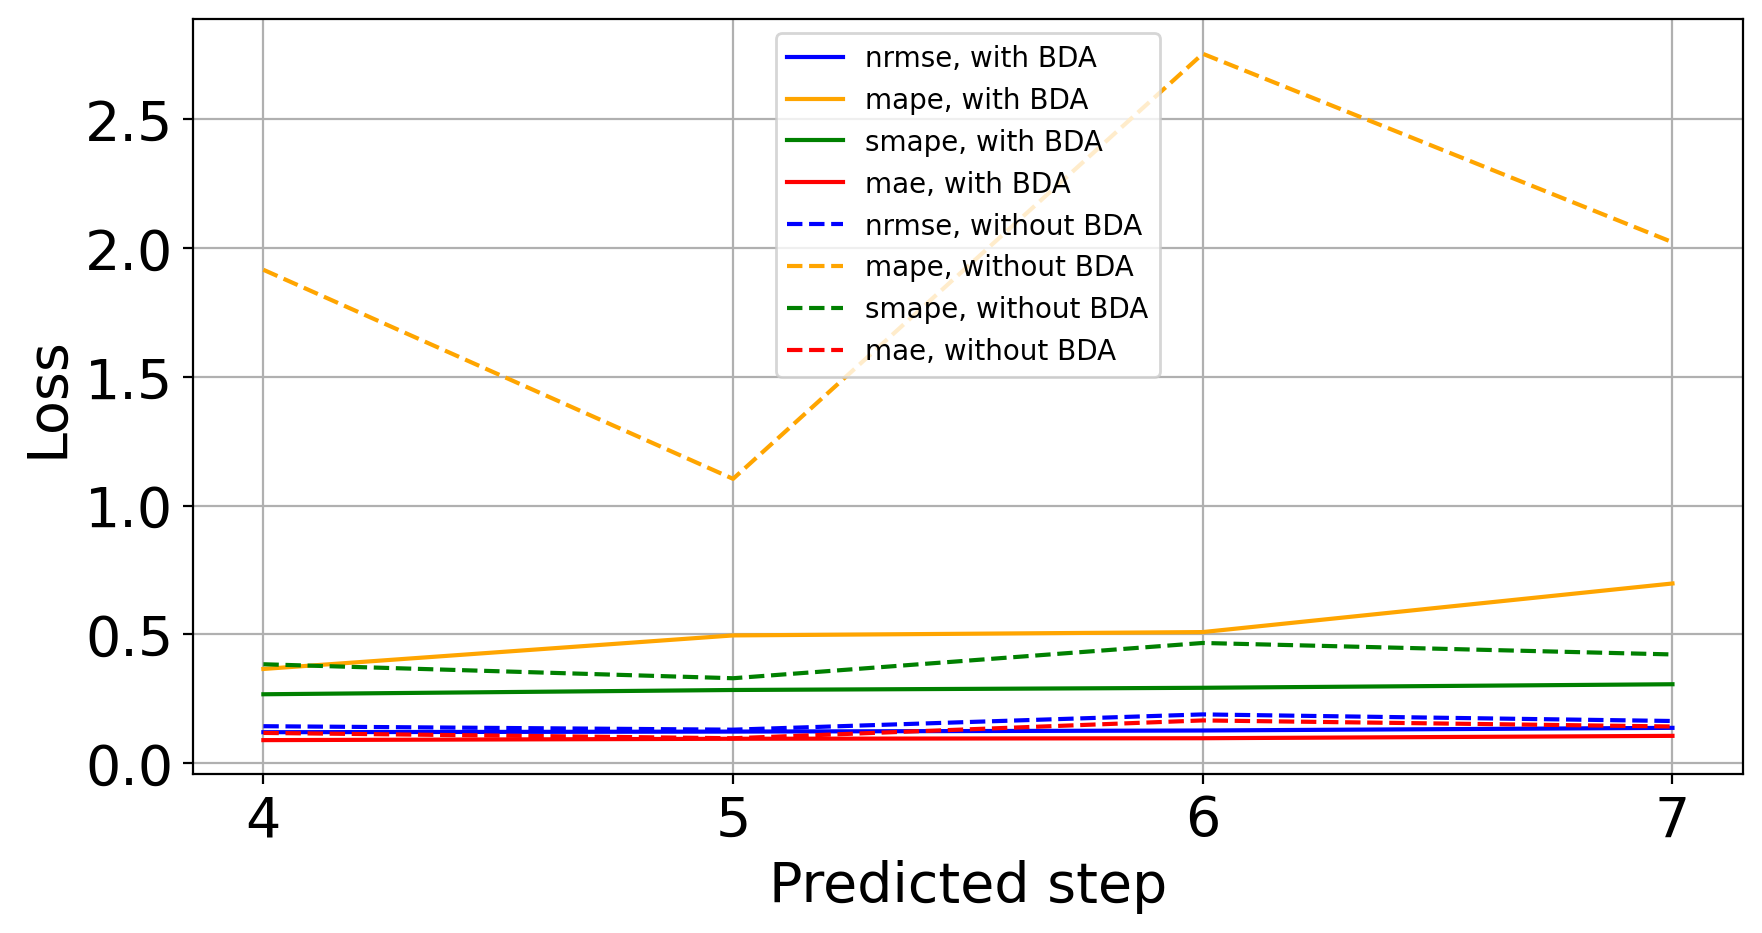

In [117]:
fig = plt.figure(figsize=[10,5], dpi=200)
ax = fig.add_subplot(111)
xtick = [4,5,6,7]
ax.plot(xtick, min_loss_df['nrmse'][1:], 'b', label='nrmse, with BDA')
ax.plot(xtick, min_loss_df['mape'][1:], 'orange', label='mape, with BDA')
ax.plot(xtick, min_loss_df['smape'][1:], 'g', label='smape, with BDA')
ax.plot(xtick, min_loss_df['mae'][1:], 'r', label='mae, with BDA')

ax.plot(xtick, s_a_l_base['nrmse'][1:], 'b--', label='nrmse, without BDA')
ax.plot(xtick, s_a_l_base['mape'][1:], '--', color='orange', label='mape, without BDA')
ax.plot(xtick, s_a_l_base['smape'][1:], 'g--', label='smape, without BDA')
ax.plot(xtick, s_a_l_base['mae'][1:], 'r--', label='mae, without BDA')
ax.legend(loc=0)
ax.grid()
ax.set_xlabel('Predicted step', fontsize=20)
ax.set_ylabel('Loss', fontsize=20)
ax.set_xticks(xtick)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(0.0, 0.4)

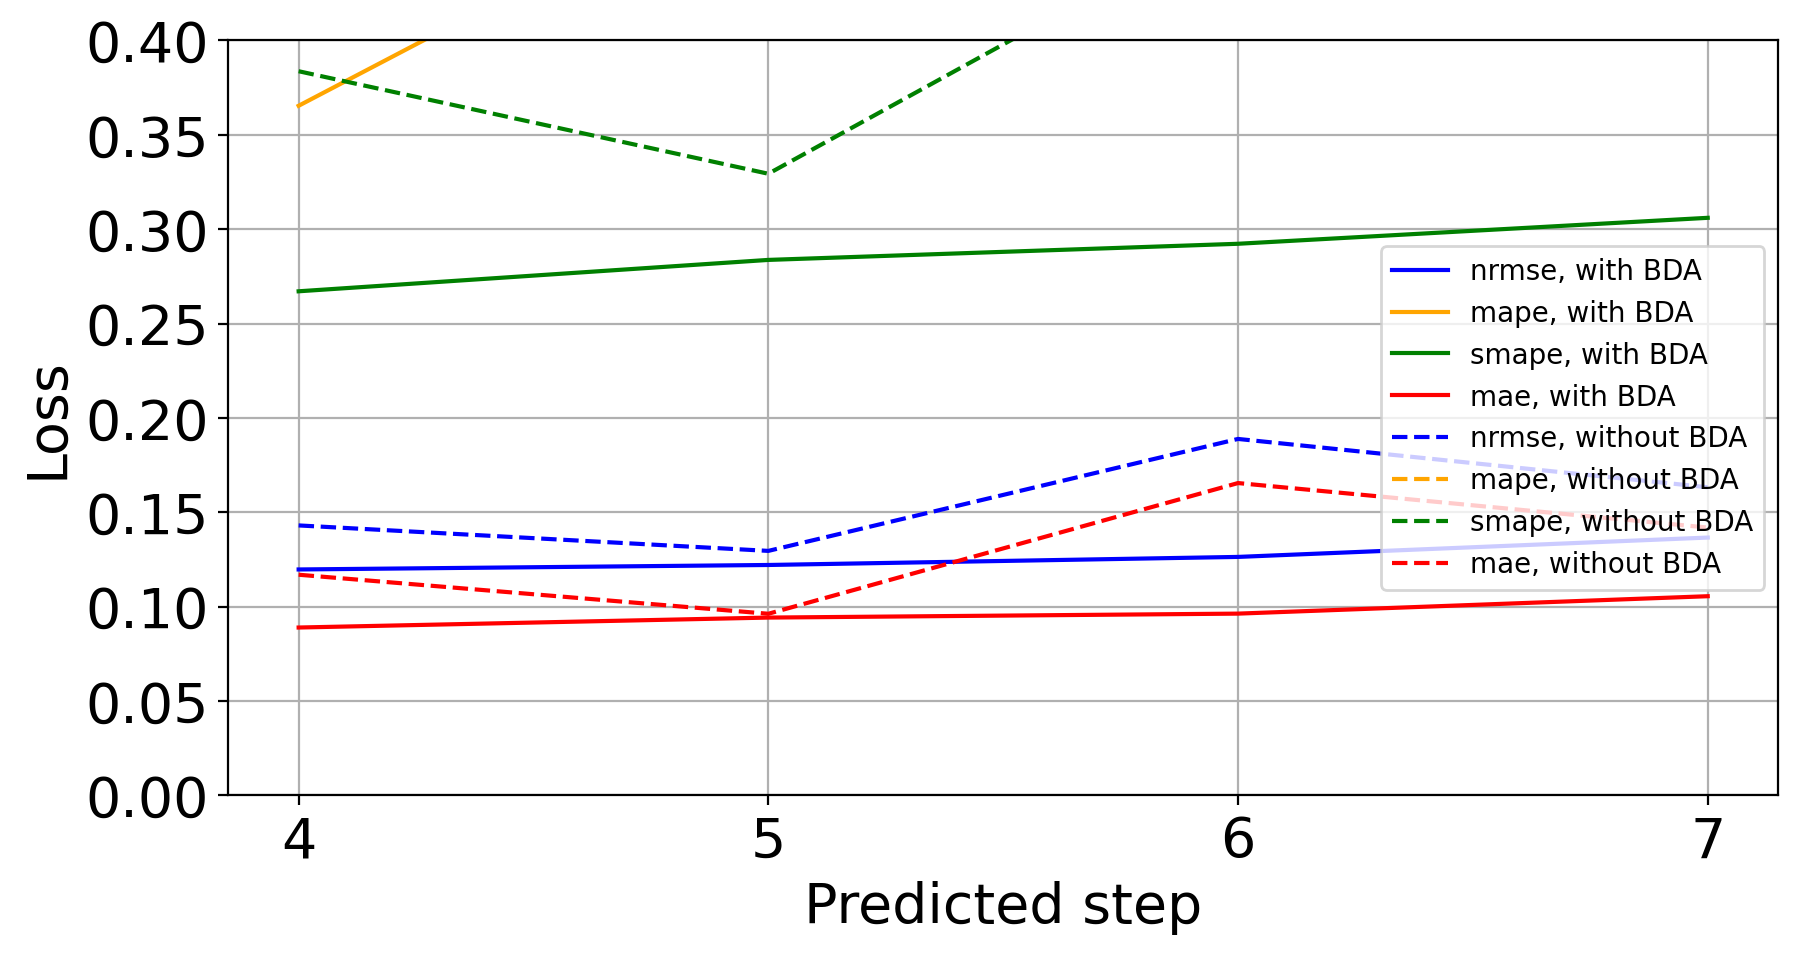

In [124]:
fig = plt.figure(figsize=[10,5], dpi=200)
ax = fig.add_subplot(111)
xtick = [4,5,6,7]
ax.plot(xtick, min_loss_df['nrmse'][1:], 'b', label='nrmse, with BDA')
ax.plot(xtick, min_loss_df['mape'][1:], 'orange', label='mape, with BDA')
ax.plot(xtick, min_loss_df['smape'][1:], 'g', label='smape, with BDA')
ax.plot(xtick, min_loss_df['mae'][1:], 'r', label='mae, with BDA')

ax.plot(xtick, s_a_l_base['nrmse'][1:], 'b--', label='nrmse, without BDA')
ax.plot(xtick, s_a_l_base['mape'][1:], '--', color='orange', label='mape, without BDA')
ax.plot(xtick, s_a_l_base['smape'][1:], 'g--', label='smape, without BDA')
ax.plot(xtick, s_a_l_base['mae'][1:], 'r--', label='mae, without BDA')
ax.legend(loc=7)
ax.grid()
ax.set_xlabel('Predicted step', fontsize=20)
ax.set_ylabel('Loss', fontsize=20)
ax.set_xticks(xtick)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylim([0, 0.4])

# Analysis

# 关于哪个detector的分析